------------------------------------
Parameters for Component: Occultquad
------------------------------------
Parameter:        p  Occultquad, [       p], value:            0, free: False, restricted: False, related: False
Parameter:        a  Occultquad, [       a], value:            0, free: False, restricted: False, related: False
Parameter:        i  Occultquad, [       i], value:            0, free: False, restricted: False, related: False
Parameter:       T0  Occultquad, [      T0], value:            0, free: False, restricted: False, related: False
Parameter:      per  Occultquad, [     per], value:            0, free: False, restricted: False, related: False
Parameter:        b  Occultquad, [       b], value:            0, free: False, restricted: False, related: False
Parameter:  linLimb  Occultquad, [ linLimb], value:            0, free: False, restricted: False, related: False
Parameter: quadLimb  Occultquad, [quadLimb], value:            0, free: False, restricted: False, 

<ipython-input-13-107bda3a631c>:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


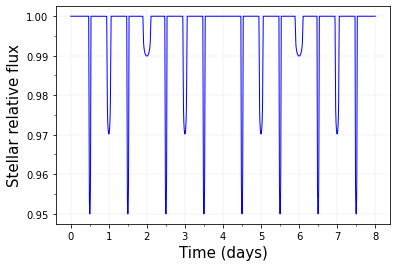

In [13]:
# Import some unrelated modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# ... and now the forTrans module
from PyAstronomy.modelSuite import forTrans as ft

fig = plt.figure(1)
ax1 = plt.subplot(111)

# Create MandelAgolLC object with
# circular orbit and quadratic limb darkening
ma = ft.MandelAgolLC(orbit="circular", ld="quad")
ma1 = ft.MandelAgolLC(orbit="circular", ld="quad")
ma2 = ft.MandelAgolLC(orbit="circular", ld="quad")
ma3 = ft.MandelAgolLC(orbit="circular", ld="quad")

# See the available parameters and their current values
ma.parameterSummary()

# Set parameters 1
ma1["per"] = 1
ma1["i"] = 90.0
ma1["a"] = 6.5
ma1["T0"] = 0.5
ma1["p"] = 0.201
ma1["linLimb"] = 0.47
ma1["quadLimb"] = 0.24
ma1["b"] = 0.


# Set parameters 2
ma2["per"] = 2
ma2["i"] = 90.0
ma2["a"] = 6.5
ma2["T0"] = 1.0
ma2["p"] = 0.155
ma2["linLimb"] = 0.47
ma2["quadLimb"] = 0.24
ma2["b"] = 0.

# Set parameters 3
ma3["per"] = 4
ma3["i"] = 90.0
ma3["a"] = 6.5
ma3["T0"] = 2.
ma3["p"] = 0.09
ma3["linLimb"] = 0.47
ma3["quadLimb"] = 0.24
ma3["b"] = 0.

# Choose some time axis
time = np.linspace(0, 8, 10000)

# ... and calculate model
y1 = ma1.evaluate(time)
y2 = ma2.evaluate(time)
y3 = ma3.evaluate(time)
y = ma3.evaluate(time)

for i in range(1,10000,1):
    y[i]=min(y1[i],y2[i],y3[i])

plt.grid(color='grey', linestyle=':', linewidth=0.2)
plt.grid(True)
#plt.xticks(np.arange(min(time), max(time)+1, 1))


ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.005))

# Let's see what happened ...
plt.plot(time, y, color='blue', linewidth=1)




plt.xlabel("Time (days)", fontsize = 15)

plt.ylabel("Stellar relative flux", fontsize = 15)

plt_form = "pdf"
file_path = "./"
plt.savefig(file_path+"transits."+plt_form, format=str(plt_form))

plt.show()


